Classification means that dependent on the input it might be 1, 2 or 3 as result and the solution is given as percentage factor.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras as ks
import os
import logging
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
logging.getLogger('absl').setLevel(logging.ERROR)

In [2]:
model = ks.Sequential()
model.add(ks.layers.Input(shape=(224, 224, 3)))
model.add(ks.layers.Dense(64, activation='relu'))
model.add(ks.layers.Dense(3, activation='softmax'))

model.compile(optimizer=ks.optimizers.Adam(), loss=ks.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [3]:
from sklearn.datasets import make_circles

n_samples = 1000

x, y = make_circles(n_samples=n_samples, noise=0.03, factor=0.42)

In [4]:
x[:10]

array([[ 0.77892419, -0.6261435 ],
       [-0.01988638, -0.39972405],
       [-0.25754309, -0.34523113],
       [-0.32834574,  0.29857872],
       [-0.6279785 ,  0.73437007],
       [-0.34367741, -0.18007683],
       [-0.08886529, -0.40713156],
       [ 0.79526587, -0.6030313 ],
       [-0.96518398,  0.4073223 ],
       [-0.05737553,  0.46989231]])

In [5]:
y[:10]

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1])

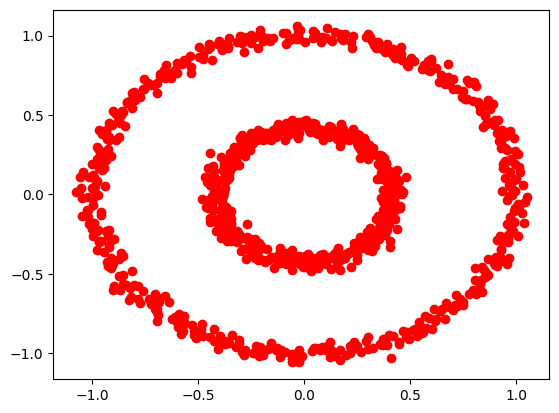

In [7]:
for i in x:
    plt.scatter(i[0], i[1], color='red')

plt.show()

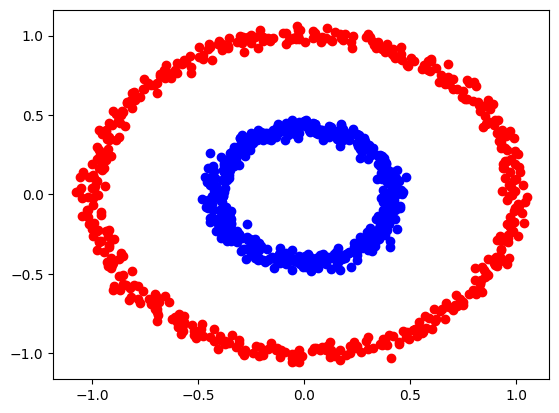

In [8]:
#show only dots with y=0 and y=1 in different colors
for i in range(len(x)):
    if y[i] == 0:
        plt.scatter(x[i][0], x[i][1], color='red')
    else:
        plt.scatter(x[i][0], x[i][1], color='blue')

So we see that y is 0 when the data represents the outer circle and 1 when the data represents the inner circle.

My idea now is, because we have a function which is not linear, we can either split the data into parts in order to make it linear or we can ... idk.


In [9]:
circles = pd.DataFrame({'X0': x[:, 0], 'X1': x[:, 1], 'label': y})
# plot.scatter(x='X0', y='X1', c='Y', colormap='viridis')
circles

,X0,X1,label
0,0.778924,-0.626144,0
1,-0.019886,-0.399724,1
2,-0.257543,-0.345231,1
3,-0.328346,0.298579,1
4,-0.627979,0.734370,0
...,...,...,...
995,-0.959497,-0.290142,0
996,0.924612,-0.260236,0
997,0.090065,0.374659,1
998,0.642961,-0.735677,0


In [10]:
x.shape, y.shape

((1000, 2), (1000,))

In [11]:
#example input and output
x[0], y[0]

(array([ 0.77892419, -0.6261435 ]), 0)

In [12]:
x[0].shape, y[0].shape

((2,), ())

In [13]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [15]:
ct = make_column_transformer(
    (MinMaxScaler(), ['X0', 'X1', 'children']),
)

x = circles[['X0', 'X1']]
py = circles.drop(['X0', 'X1'], axis=1, inplace=False)

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# x_train

Flatten the data to 1D

In [27]:
circles_x = tf.constant([circles['X0'].astype('float32'), circles['X1'].astype('float32')])
circles_x = tf.transpose(circles_x)
circles_x

<tf.Tensor: shape=(1000, 2), dtype=float32, numpy=
array([[ 0.77892417, -0.6261435 ],
       [-0.01988638, -0.39972404],
       [-0.2575431 , -0.34523112],
       ...,
       [ 0.09006497,  0.3746592 ],
       [ 0.6429606 , -0.7356773 ],
       [ 0.3717816 ,  0.02629406]], dtype=float32)>

In [33]:
circles_y = tf.constant(circles['label'])
# circles_y = tf.transpose(circles_y)
tmp = []
for i in circles_y:
    if i == 0:
       tmp.append([0,1])
    else:
       tmp.append([1,0])
circles_y = tf.constant(tmp)
circles_y

<tf.Tensor: shape=(1000, 2), dtype=int32, numpy=
array([[0, 1],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]], dtype=int32)>

In [36]:
x_train, x_test, y_train, y_test = circles_x[:800], circles_x[800:], circles_y[:800], circles_y[800:]
# x_train, x_test, y_train, y_test = train_test_split(circles_x, circles_y, test_size=0.2, random_state=42)


In [40]:
tf.random.set_seed(42)

model = ks.Sequential()
model.add(ks.layers.Input(shape=(2,)))
model.add(ks.layers.Dense(64, activation='relu'))
model.add(ks.layers.Dense(64, activation='relu'))
model.add(ks.layers.Dense(2, activation='softmax'))

model.compile(optimizer=ks.optimizers.Adam(), loss=ks.losses.CategoricalCrossentropy(), metrics=['mse'])

history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=50, verbose=2)

Epoch 1/50
25/25 - 1s - loss: 0.6920 - mse: 0.2494 - 641ms/epoch - 26ms/step
Epoch 2/50
25/25 - 0s - loss: 0.6971 - mse: 0.2518 - 246ms/epoch - 10ms/step
Epoch 3/50
25/25 - 0s - loss: 0.6944 - mse: 0.2506 - 222ms/epoch - 9ms/step
Epoch 4/50
25/25 - 0s - loss: 0.6945 - mse: 0.2506 - 205ms/epoch - 8ms/step
Epoch 5/50
25/25 - 0s - loss: 0.6963 - mse: 0.2515 - 207ms/epoch - 8ms/step
Epoch 6/50
25/25 - 0s - loss: 0.6972 - mse: 0.2519 - 205ms/epoch - 8ms/step
Epoch 7/50
25/25 - 0s - loss: 0.7005 - mse: 0.2535 - 208ms/epoch - 8ms/step
Epoch 8/50
25/25 - 0s - loss: 0.6985 - mse: 0.2525 - 226ms/epoch - 9ms/step
Epoch 9/50
25/25 - 0s - loss: 0.7074 - mse: 0.2561 - 211ms/epoch - 8ms/step
Epoch 10/50
25/25 - 0s - loss: 0.6953 - mse: 0.2508 - 204ms/epoch - 8ms/step
Epoch 11/50
25/25 - 0s - loss: 0.6956 - mse: 0.2510 - 214ms/epoch - 9ms/step
Epoch 12/50
25/25 - 0s - loss: 0.7021 - mse: 0.2542 - 201ms/epoch - 8ms/step
Epoch 13/50
25/25 - 0s - loss: 0.7046 - mse: 0.2550 - 208ms/epoch - 8ms/step
Epoch 

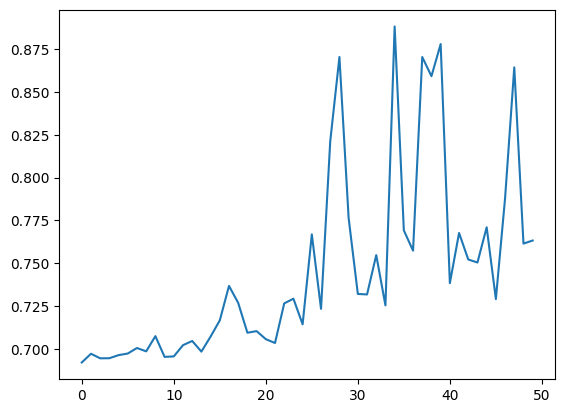

In [41]:
plt.plot(history.history['loss'])


In [42]:
model.evaluate(x=x_test, y=y_test)

7/7 [==============================] - 0s 47ms/step - loss: 1.0549 - mse: 0.3473


[1.0548738241195679, 0.34731370210647583]

In [46]:
tf.random.set_seed(42)

model = ks.Sequential()
model.add(ks.layers.Input(shape=(2,)))
model.add(ks.layers.Dense(64, activation='tanh'))
model.add(ks.layers.Dense(64, activation='tanh'))
model.add(ks.layers.Dense(2))

model.compile(optimizer=ks.optimizers.Adam(learning_rate=0.03), loss=ks.losses.CategoricalCrossentropy(), metrics=['mse'])

history = model.fit(x=x_train, y=y_train, epochs=50, verbose=2)

Epoch 1/50
25/25 - 1s - loss: 4.8315 - mse: 36.9087 - 583ms/epoch - 23ms/step
Epoch 2/50
25/25 - 0s - loss: 2.7747 - mse: 77.1970 - 127ms/epoch - 5ms/step
Epoch 3/50
25/25 - 0s - loss: 1.5030 - mse: 190.3213 - 108ms/epoch - 4ms/step
Epoch 4/50
25/25 - 0s - loss: 1.2306 - mse: 249.6939 - 110ms/epoch - 4ms/step
Epoch 5/50
25/25 - 0s - loss: 1.3995 - mse: 292.9178 - 108ms/epoch - 4ms/step
Epoch 6/50
25/25 - 0s - loss: 0.6203 - mse: 296.1562 - 106ms/epoch - 4ms/step
Epoch 7/50
25/25 - 0s - loss: 0.5659 - mse: 231.0283 - 109ms/epoch - 4ms/step
Epoch 8/50
25/25 - 0s - loss: 0.4858 - mse: 138.8596 - 107ms/epoch - 4ms/step
Epoch 9/50
25/25 - 0s - loss: 5.1964 - mse: 75.6993 - 111ms/epoch - 4ms/step
Epoch 10/50
25/25 - 0s - loss: 8.2202 - mse: 502.2554 - 111ms/epoch - 4ms/step
Epoch 11/50
25/25 - 0s - loss: 8.2202 - mse: 626.0604 - 111ms/epoch - 4ms/step
Epoch 12/50
25/25 - 0s - loss: 8.2202 - mse: 636.3490 - 106ms/epoch - 4ms/step
Epoch 13/50
25/25 - 0s - loss: 8.2202 - mse: 637.1319 - 103ms/e

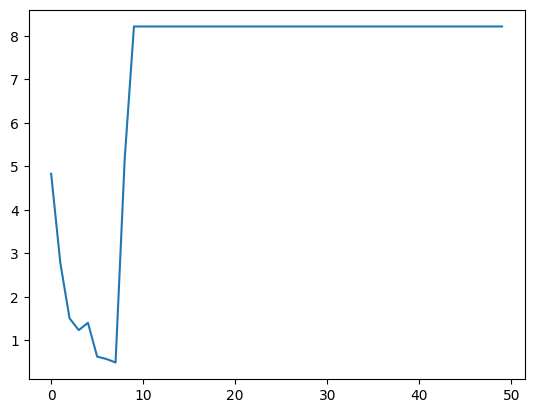

In [47]:
plt.plot(history.history['loss'])


In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())